In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import os

chat = pd.read_csv('/content/chat_sales_panel_qwen_prices.csv')
display(chat.head())

,domain,date,post,attention_index,embedding_distance,true_distance,distance_used,T_it,is_com,length,...,has_hyphen,has_digit,exact_match,alpha_i,lambda_t,log_price_latent,sale_prob,sold,log_price_obs,price_obs
0,chat.com,2021-08-01,0,0.146474,-1.986821e-07,0.0,0.0,0.146474,1,4,...,0,0,1,0.126336,0.035712,1.959744,0.325153,1,1.989244,7.310008
1,chat.com,2022-02-01,0,0.334730,-1.986821e-07,0.0,0.0,0.334730,1,4,...,0,0,1,0.126336,0.016995,2.003289,0.332359,1,2.037754,7.673357
2,chat.com,2022-05-01,0,0.242582,-1.986821e-07,0.0,0.0,0.242582,1,4,...,0,0,1,0.126336,0.048419,2.048363,0.339903,1,2.039248,7.684825
3,chat.com,2022-06-01,0,0.388564,-1.986821e-07,0.0,0.0,0.388564,1,4,...,0,0,1,0.126336,-0.006305,1.738981,0.289922,1,1.791029,5.995617
4,chat.com,2022-10-01,0,0.350649,-1.986821e-07,0.0,0.0,0.350649,1,4,...,0,0,1,0.126336,0.086624,2.025354,0.336042,1,2.095069,8.125999


In [61]:

multi  = pd.read_csv("/content/multi_keyword_cross_section_all_qwen_prices.csv")
display(multi .head())

,domain,sld,tld,is_com,length,has_hyphen,has_digit,token_count,cluster_keyword,exact_match,...,distance_used,S_k,slope_k,alpha_i,gamma_k,log_price_latent,sale_prob,sold,log_price_obs,price_obs
0,chat.com,chat,.com,1,4,0,0,1,chat,1,...,0.000000,0.75,-1.675,0.106651,1.837847,2.524104,0.441981,1,2.543908,12.729326
1,top-chat-solutions.com,top-chat-solutions,.com,1,18,1,0,3,chat,0,...,0.459361,0.75,-1.675,-0.363994,1.769260,0.603520,0.171145,0,NaN,NaN
2,chatmy.com,chatmy,.com,1,6,0,0,1,chat,0,...,0.223910,0.75,-1.675,0.262658,1.881523,2.320230,0.407131,0,NaN,NaN
3,elitechatai.com,elitechatai,.com,1,11,0,0,1,chat,0,...,0.567057,0.75,-1.675,0.329198,1.882416,1.728051,0.312090,0,NaN,NaN
4,quickchathelp.com,quickchathelp,.com,1,13,0,0,1,chat,0,...,0.330518,0.75,-1.675,-0.682862,1.814725,1.433387,0.269605,0,NaN,NaN


In [62]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import os

# Global style for all figures (safe rcParams only)
mpl.rcParams.update({
    "figure.dpi": 150,
    "figure.figsize": (5, 3.5),       # default figure size
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.labelsize": 11,
    "axes.titlesize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "font.family": "serif",
})

os.makedirs("figures", exist_ok=True)

def savefig_paper(name):
    plt.tight_layout()
    plt.savefig(f"figures/{name}.png", dpi=300, bbox_inches="tight")
    plt.savefig(f"figures/{name}.pdf", bbox_inches="tight")


In [63]:
def summary_table(df, name="dataset"):
    """
    Returns a table with:
    N (count), mean, median, 25% and 75% quartiles, min, max
    for all numeric variables in df.
    """
    numeric_cols = df.select_dtypes(include="number").columns.tolist()
    print(f"\nNumeric columns in {name}: {numeric_cols}")

    desc = df[numeric_cols].describe(
        percentiles=[0.25, 0.5, 0.75]
    ).T  # variables as rows

    # Keep and rename columns
    desc = desc[["count", "mean", "min", "25%", "50%", "75%", "max"]]
    desc = desc.rename(
        columns={
            "count": "N",
            "mean": "mean",
            "min": "min",
            "25%": "q25",
            "50%": "median",
            "75%": "q75",
            "max": "max",
        }
    )

    return desc


In [64]:
chat_summary = summary_table(chat)
print("\n Summary Chat:")
print(chat_summary)


Numeric columns in dataset: ['post', 'attention_index', 'embedding_distance', 'true_distance', 'distance_used', 'T_it', 'is_com', 'length', 'age_years', 'has_hyphen', 'has_digit', 'exact_match', 'alpha_i', 'lambda_t', 'log_price_latent', 'sale_prob', 'sold', 'log_price_obs', 'price_obs']

 Summary Chat:
                         N       mean           min       q25     median  \
post                2372.0   0.523609  0.000000e+00  0.000000   1.000000   
attention_index     2372.0   0.533215  1.464740e-01  0.334730   0.598055   
embedding_distance  2372.0   0.336233 -1.986821e-07  0.249552   0.329799   
true_distance       2372.0   0.305629  0.000000e+00  0.170671   0.302997   
distance_used       2372.0   0.336233  0.000000e+00  0.249552   0.329799   
T_it                2372.0   0.264192  2.600680e-02  0.154678   0.244930   
is_com              2372.0   0.744098  0.000000e+00  0.000000   1.000000   
length              2372.0  11.655987  4.000000e+00  9.000000  11.000000   
age_years 

In [65]:
multi_summary = summary_table(multi)
print("\n Summary Multi:")
print(multi_summary)



Numeric columns in dataset: ['is_com', 'length', 'has_hyphen', 'has_digit', 'token_count', 'exact_match', 'age_years', 'true_distance', 'embedding_distance', 'distance_used', 'S_k', 'slope_k', 'alpha_i', 'gamma_k', 'log_price_latent', 'sale_prob', 'sold', 'log_price_obs', 'price_obs']

 Summary Multi:
                         N       mean           min        q25     median  \
is_com              1146.0   0.717277  0.000000e+00   0.000000   1.000000   
length              1146.0  13.012216  4.000000e+00  11.000000  13.000000   
has_hyphen          1146.0   0.147469  0.000000e+00   0.000000   0.000000   
has_digit           1146.0   0.200698  0.000000e+00   0.000000   0.000000   
token_count         1146.0   1.193717  1.000000e+00   1.000000   1.000000   
exact_match         1146.0   0.005236  0.000000e+00   0.000000   0.000000   
age_years           1146.0   4.054194  4.748481e-01   2.314367   3.421711   
true_distance       1146.0   0.327870  0.000000e+00   0.191075   0.316539   
emb

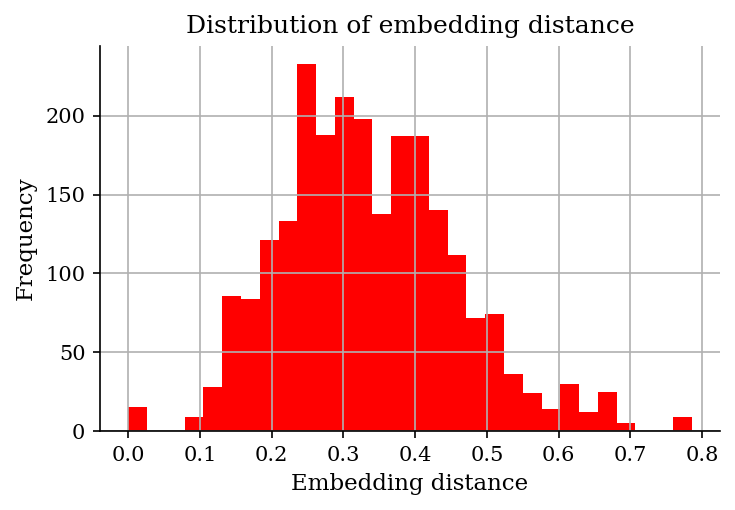

In [66]:
plt.figure()
chat["embedding_distance"].hist(bins=30, color='red')
plt.xlabel("Embedding distance")
plt.ylabel("Frequency")
plt.title("Distribution of embedding distance")
plt.tight_layout()
plt.show()

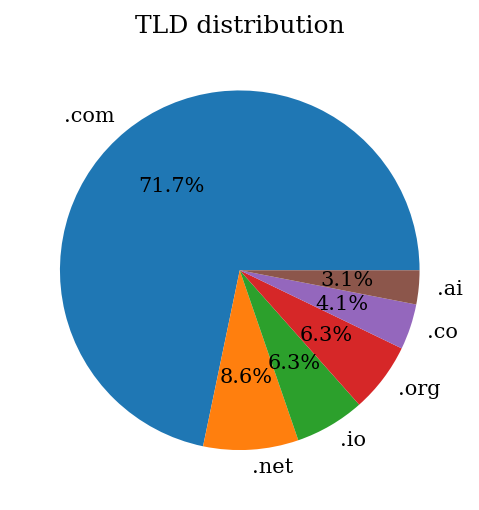

In [67]:
# TLD distribution
tld_counts = multi["tld"].value_counts()

top_n = 10
tld_top = tld_counts.head(top_n)
if len(tld_counts) > top_n:
    tld_top["Other"] = tld_counts.iloc[top_n:].sum()

plt.figure()
plt.pie(
    tld_top.values,
    labels=tld_top.index,
    autopct="%1.1f%%"
)
plt.title("TLD distribution")
plt.tight_layout()
plt.show()


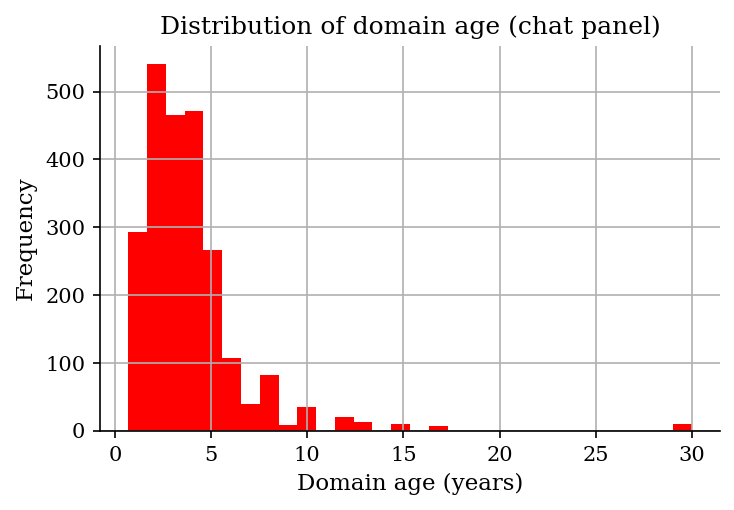

In [73]:
plt.figure()
chat["age_years"].hist(bins=30, color='red')
plt.xlabel("Domain age (years)")
plt.ylabel("Frequency")
plt.title("Distribution of domain age (chat panel)")
plt.tight_layout()
plt.show()

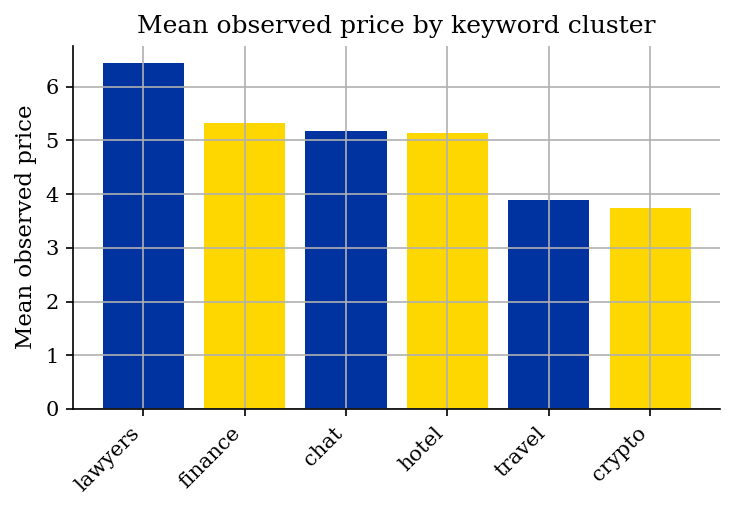

cluster_keyword
lawyers    6.444796
finance    5.325686
chat       5.165642
hotel      5.134828
travel     3.880963
crypto     3.738319
Name: price_obs, dtype: float64


In [69]:
# Mean observed price by cluster_keyword
mean_price_by_cluster = (
    multi
    .groupby("cluster_keyword")["price_obs"]
    .mean()
    .sort_values(ascending=False)
)

top_clusters = mean_price_by_cluster.head(10)

plt.figure()
plt.bar(top_clusters.index, top_clusters.values, color=['#0033A0', '#FFD700'])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Mean observed price")
plt.title("Mean observed price by keyword cluster")
plt.tight_layout()
plt.show()

print(top_clusters)

In [70]:



chat["date"] = pd.to_datetime(chat["date"])

dist_domain = chat.groupby("domain")["distance_used"].first()

median_dist = dist_domain.median()
print("Median distance_used:", median_dist)

# domain → group label
domain_group = (dist_domain > median_dist).map(
    {False: "Near center", True: "Far from center"}
)

# attach to every row in the panel
chat = chat.join(domain_group.rename("dist_group"), on="domain")




Median distance_used: 0.3377004464467367


,domain,distance_used,dist_group
0,chat.com,0.0,Near center
1,chat.com,0.0,Near center
2,chat.com,0.0,Near center
3,chat.com,0.0,Near center
4,chat.com,0.0,Near center


In [71]:
# Keep only pre-treatment observations
pre = chat[chat["post"] == 0].copy()

# Average log_price_obs by date and distance group
avg_pre = (
    pre.groupby(["date", "dist_group"])["log_price_obs"]
       .mean()
       .reset_index()
)

pt = (
    avg_pre
    .pivot(index="date", columns="dist_group", values="log_price_obs")
    .sort_index()
)

print(pt.head())


dist_group  Far from center  Near center
date                                    
2021-01-01         1.052103     1.467147
2021-02-01         1.073774     1.469593
2021-03-01         1.114585     1.291954
2021-04-01         1.135462     1.340930
2021-05-01         1.057280     1.383445


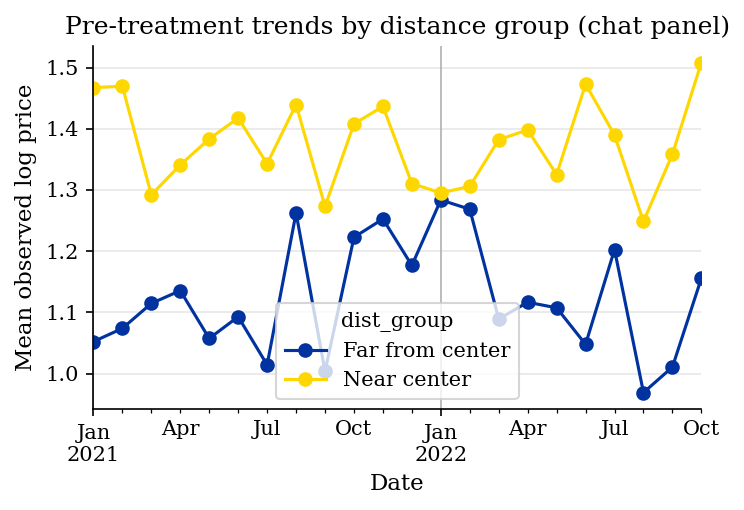

In [74]:
# Plot parallel trends
os.makedirs("figures", exist_ok=True)

plt.figure()
ax = plt.gca()

pt.plot(marker="o", ax=ax, color=['#0033A0', '#FFD700'])  # two lines: Near center vs Far from center

ax.grid(axis="y", linestyle="-", alpha=0.3)
ax.set_xlabel("Date")
ax.set_ylabel("Mean observed log price")
ax.set_title("Pre-treatment trends by distance group (chat panel)")

plt.tight_layout()
plt.savefig("figures/parallel_trends_chat_panel.png", dpi=300, bbox_inches="tight")
plt.savefig("figures/parallel_trends_chat_panel.pdf", bbox_inches="tight")
plt.show()